In [30]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=load_wine()

In [3]:
df

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [4]:
wine_df=pd.DataFrame(data=df.data,columns=df.feature_names)

In [5]:
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [6]:
wine_df["target"]=df.target

In [7]:
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [8]:
wine_df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                            int32
dtype: object

In [9]:
wine_df.shape

(178, 14)

In [10]:
wine_df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [11]:
x=wine_df.drop(labels="target",axis=1)

In [12]:
y=wine_df["target"]

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=10)

In [14]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [15]:
y_pred=knn_model.predict(x_test)

In [16]:
accuracy_score(y_test,y_pred)

0.7222222222222222

In [17]:
confusion_matrix(y_test,y_pred)

array([[ 9,  0,  1],
       [ 2, 11,  5],
       [ 0,  2,  6]], dtype=int64)

In [18]:
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
y_pred=knn_model.predict(x_test)

In [20]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.6944444444444444
[[ 9  0  1]
 [ 4 11  3]
 [ 1  2  5]]


In [21]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
scaled_x=std_scaler.fit_transform(x)    

In [22]:
scaled_x

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [23]:
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,train_size=0.80,random_state=10)

In [24]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)
y_pred=knn_model.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8888888888888888
[[10  0  0]
 [ 1 14  3]
 [ 0  0  8]]


In [25]:
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)
y_pred=knn_model.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9166666666666666
[[10  0  0]
 [ 0 15  3]
 [ 0  0  8]]


In [26]:
from sklearn.model_selection import cross_val_score

In [28]:
knn_model=KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train,y_train)
y_pred=knn_model.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9166666666666666
[[10  0  0]
 [ 0 15  3]
 [ 0  0  8]]


In [31]:
cv_scores=[]

for i in range(1,30,1):
    knn_model=KNeighborsClassifier(n_neighbors=i)
    kfold=KFold(n_splits=5, shuffle=True, random_state=12)
    cross_validation_score=cross_val_score(estimator=knn_model,X=scaled_x,y=y,cv=kfold)
    print(cross_validation_score.mean())
    cv_scores.append(cross_validation_score.mean())

0.9603174603174605
0.9434920634920635
0.9604761904761905
0.949047619047619
0.9719047619047618
0.9660317460317461
0.9717460317460318
0.9717460317460318
0.9660317460317461
0.9660317460317461
0.9660317460317461
0.9660317460317461
0.9774603174603176
0.9660317460317461
0.9660317460317461
0.9660317460317461
0.9660317460317461
0.9603174603174605
0.9660317460317461
0.9717460317460318
0.9831746031746033
0.9774603174603176
0.9774603174603176
0.9717460317460318
0.9717460317460318
0.9717460317460318
0.9717460317460318
0.9717460317460318
0.9661904761904762


In [32]:
cv_scores

[0.9603174603174605,
 0.9434920634920635,
 0.9604761904761905,
 0.949047619047619,
 0.9719047619047618,
 0.9660317460317461,
 0.9717460317460318,
 0.9717460317460318,
 0.9660317460317461,
 0.9660317460317461,
 0.9660317460317461,
 0.9660317460317461,
 0.9774603174603176,
 0.9660317460317461,
 0.9660317460317461,
 0.9660317460317461,
 0.9660317460317461,
 0.9603174603174605,
 0.9660317460317461,
 0.9717460317460318,
 0.9831746031746033,
 0.9774603174603176,
 0.9774603174603176,
 0.9717460317460318,
 0.9717460317460318,
 0.9717460317460318,
 0.9717460317460318,
 0.9717460317460318,
 0.9661904761904762]

In [33]:
from matplotlib import pyplot as plt

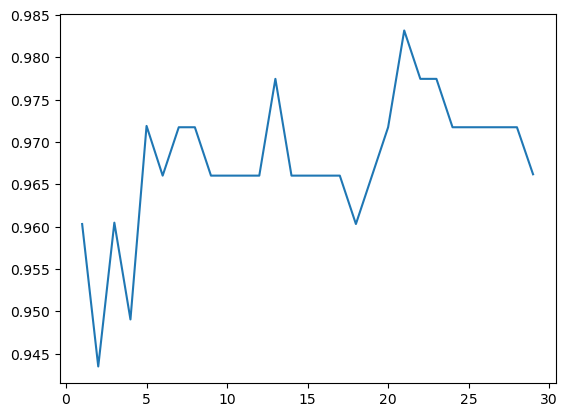

In [35]:
plt.plot(range(1,30),cv_scores)

In [36]:
cv_scores.index(max(cv_scores))

20